# Занятие 12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 100
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([5, 1, 2, 4, 3, 6, 1, 2, 4, 3, 6, 1, 4, 2, 1, 1, 6, 1, 1, 1, 6, 1,
       4, 2, 4, 4, 3, 4, 4, 4, 4, 5, 1, 4, 5, 6, 4, 4, 5, 2, 6, 4, 2, 3,
       4, 3, 5, 2, 4, 6, 5, 3, 3, 1, 1, 4, 3, 3, 6, 6, 6, 6, 6, 6, 2, 6,
       5, 2, 1, 3, 2, 2, 6, 3, 1, 5, 5, 5, 5, 1, 3, 1, 5, 5, 4, 1, 1, 1,
       3, 3, 6, 6, 1, 6, 4, 6, 3, 2, 3, 3])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[20 12 17 19 13 19]
[0.2  0.12 0.17 0.19 0.13 0.19]
[1 2 3 4 5 6]
1.0


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 3 4 5]
10: [0.1 0.3 0.2 0.4] 1.0
[1 2 3 4 5 6]
100: [0.17 0.16 0.18 0.15 0.2  0.14] 1.0
[1 2 3 4 5 6]
1000: [0.173 0.18  0.168 0.156 0.159 0.164] 1.0
[1 2 3 4 5 6]
10000: [0.1659 0.168  0.1691 0.167  0.1593 0.1707] 1.0
[1 2 3 4 5 6]
100000: [0.16626 0.16663 0.16677 0.16737 0.16576 0.16721] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)  #10000
#sample

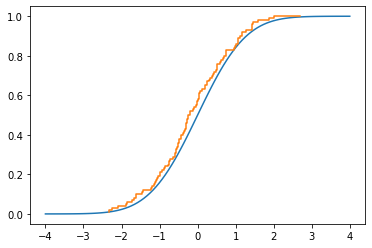

In [7]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 3.  2.  5.  4.  9.  9. 15. 12.  9.  9.  5.  9.  5.  1.  2.  0.  1.] [-2.32969258 -2.03444169 -1.7391908  -1.44393991 -1.14868902 -0.85343813
 -0.55818723 -0.26293634  0.03231455  0.32756544  0.62281633  0.91806722
  1.21331811  1.50856901  1.8038199   2.09907079  2.39432168  2.68957257] 18


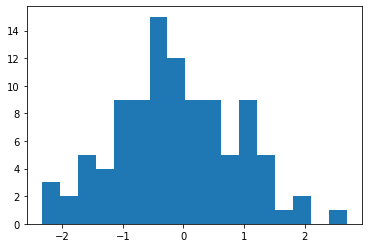

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, bins=17 )
print(b, n, len(n))

In [9]:
len(n)

18

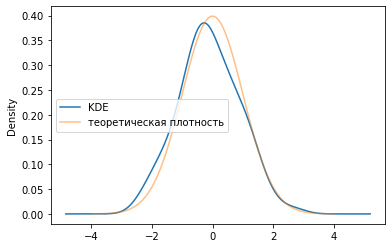

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 1.59777824, -1.32494343,  0.01898894,  0.76280882, -0.15490849,
        2.18198796, -0.33840246,  1.6328263 ,  0.62130274, -0.70467067,
       -0.56610736, -0.2519375 ,  0.74687518, -0.50990761, -1.76030387,
       -1.51361206, -1.33019066, -0.56136351, -0.06757219, -1.16332638,
        0.60269718,  0.83878569, -0.86129689, -0.37844913, -1.65600714,
       -1.6583141 , -0.83145287, -0.24184711, -0.55076716, -0.50851021,
        0.80927412,  0.44869942,  0.30883419, -0.44231311,  1.92531251,
        0.4484708 ,  0.07343491,  0.82939024,  0.3833632 ,  1.08060232,
       -1.0323138 , -1.63140188,  0.7311905 , -0.42484991,  0.27153661,
        0.7369045 , -0.47865532, -0.12940017,  0.86942241, -0.01621442,
        1.77138989, -0.07247797,  0.36408792,  0.9063258 , -1.23620445,
        2.2060613 , -0.07532022,  1.41336366,  1.02636237, -1.34813535,
        2.56248032, -0.07721187, -0.52850453, -1.72860369,  0.72836412,
       -0.94604989, -0.54623018,  0.08527578, -1.30209438,  2.18

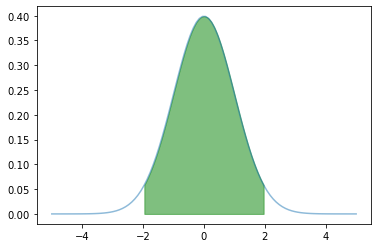

In [12]:
x = np.linspace(-5,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.ppf(0.5)

0.0

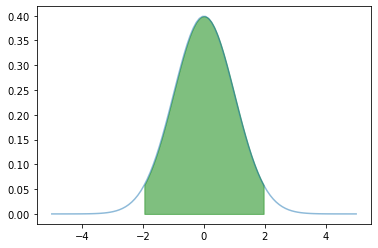

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Интервал для N 10 4.165 ... 15.322
Интервал для N 50 4.627 ... 9.616
Интервал для N 100 4.736 ... 8.264
Интервал для N 1000 4.917 ... 6.032
Интервал для N 10000 4.974 ... 5.326


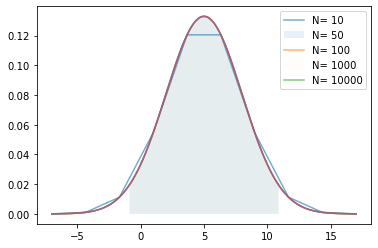

In [16]:

# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 3
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 1000, 10000]
#colors = ['cyan', "purple", "orange", "yellow"]
for n in N:
    sample = np.linspace(-7, 17, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = .6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print ("Интервал для N %.f %.3f ... %.3f" % (n, sample.mean() + q_a_m * sigma/np.sqrt(n) ,#!!! + т.к. q_a_m отрицательное
                                                sample.mean() + q_a_p * sigma/np.sqrt(n)))

Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [17]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.80542511, 1.77578354, 3.20602104, 3.36408783, 2.97182404,
       3.16160266, 2.80128241, 2.15833166, 2.80904417, 3.75195284])

In [18]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.00933661, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00933661, 0.00933661, 0.02800982,
        0.06535624, 0.05601963, 0.06535624, 0.05601963, 0.12137587,
        0.21474193, 0.25208835, 0.24275175, 0.35479102, 0.71891864,
        0.94299718, 0.91498736, 1.10171947, 1.67125242, 1.78329169,
        2.11940949, 2.14741931, 2.4555273 , 3.28648521, 3.47321732,
        3.82800834, 3.83734494, 4.36953147, 4.37886807, 4.64962964,
        4.45356092, 4.31351183, 4.60294661, 4.39754128, 4.41621449,
        3.85601815, 3.38918787, 3.6132664 , 2.82899153, 2.67960583,
        2.15675592, 2.05405325, 1.59655957, 1.22309535, 1.16707571,
        0.76560167, 0.72825524, 0.43882047, 0.36412762, 0.39213744,
        0.19606872, 0.14938569, 0.11203927, 0.06535624, 0.11203927,
        0.05601963, 0.03734642, 0.00933661, 0.02800982]),
 array([2.11651544, 2.12722597, 2.1379365 , 2.14864703, 2.15935756,
        2.17006809, 2.18077862, 2.19148915, 2.20219968, 2.

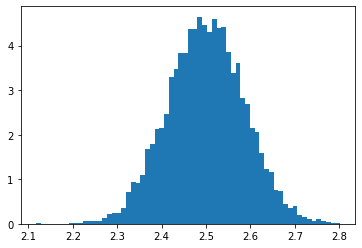

In [19]:
plt.hist(means, density=True, bins='auto')

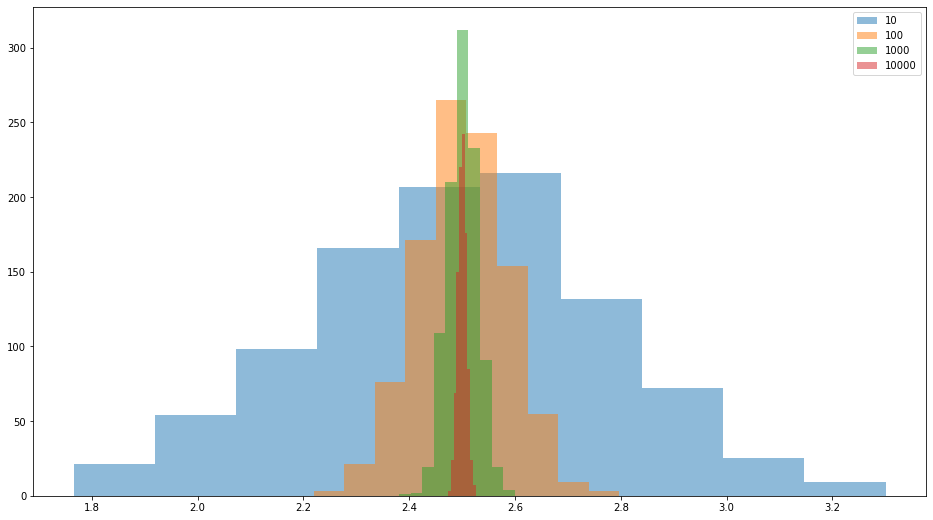

In [20]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [21]:
uniform_rv.rvs(N)

array([3.04646045, 1.29929548, 3.72349952, ..., 2.96806573, 2.36260223,
       3.0746242 ])

In [22]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [23]:
uniform_rv.mean()

2.5

In [24]:
uniform_rv.var()

0.75

In [25]:
uniform_rv.std()

0.8660254037844386

[]

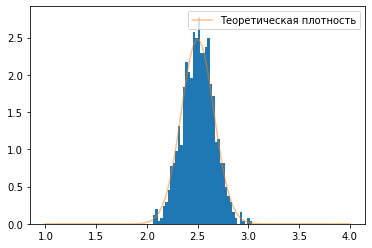

In [26]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N-1))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [27]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * uniform_rv.std() / np.sqrt(N-1), np.mean(data) + 1.96 * uniform_rv.std() / np.sqrt(N-1) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [1.9188506761612831, 2.5492528466459063] 
Доверительный интервал для среднего по цпт интервальная оценка: (1.901326286893738, 2.566777235913452) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.1767257867845453, 2.2913777360226444) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [28]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 6,  9,  8,  8,  7,  8,  8, 10,  6,  8])

Text(0.5, 0, '$x$')

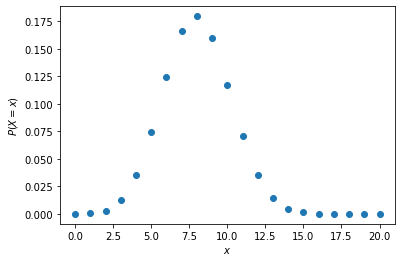

In [29]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

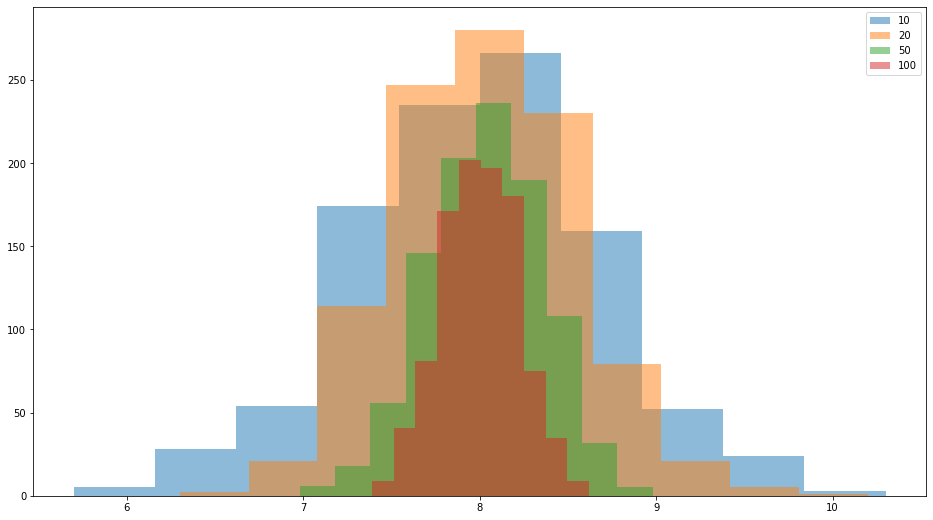

In [30]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [31]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

Text(0.5, 0, '$x$')

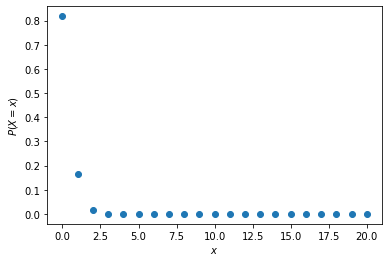

In [32]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

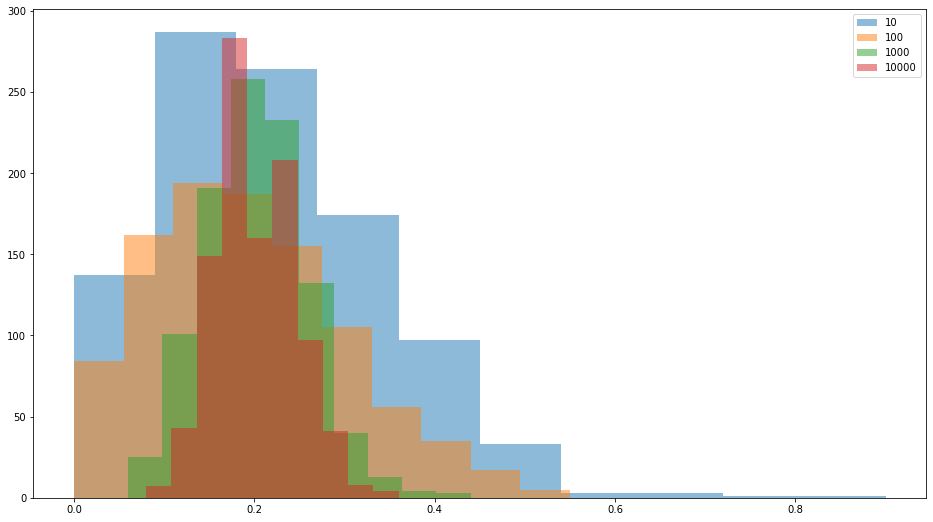

In [33]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()